In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import linalg

<function scipy.linalg.decomp.eig(a, b=None, left=False, right=True, overwrite_a=False, overwrite_b=False, check_finite=True, homogeneous_eigvals=False)>


---
# VIDEO: The quadratic form in algbebra
---


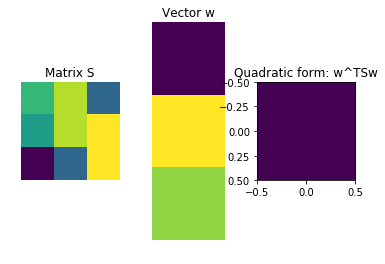

In [21]:
# matrix and vector
S = [ [1, 3, -2], 
      [0, 3, 4],
      [-5, -2, 4] ]

w = np.transpose([ [-2, 4, 3] ])

# compute the quadratic form
qf = np.transpose(w)@S@w

n = len(w) # used for plotting

# show the matrices
plt.subplot(131)
plt.imshow(S)
plt.axis('off')
plt.title('Matrix S')

plt.subplot(132)
plt.imshow(w)
plt.axis('off')
plt.title('Vector w')

plt.subplot(133)
plt.imshow(qf)
plt.title('Quadratic form: w^TSw')

plt.show()


---
# VIDEO: The quadratic form in geometry
---


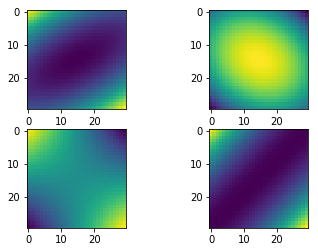

In [5]:
# some different matrices
S = np.zeros((4,), dtype=np.object)
S[0] = [ [4,4], [4,9] ]
S[1] = [ [-4,-1], [3,-5] ]
S[2] = [ [0,1], [2,0] ]
S[3] = [ [1,1], [1,1] ]

# range for vector w
n = 30
wRange = np.linspace(-2,2,n)

# initialize quadratic form matrix
qf = np.zeros( (len(wRange),len(wRange)) )


for i in range(4):
    
    # compute QF
    for xi in range(n):
        for yi in range(n):
            # this w
            w = np.transpose([ wRange[xi], wRange[yi] ])
            
            # QF
            qf[xi,yi] = np.transpose(w)@S[i]@w
    
    # show the map
    plt.subplot(2,2,i+1)
    plt.imshow(qf)

plt.show()

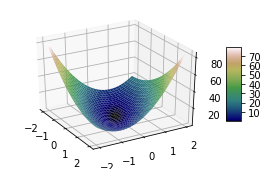

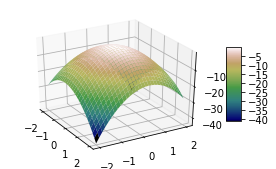

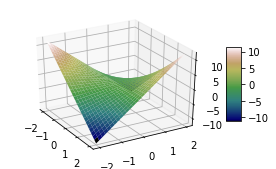

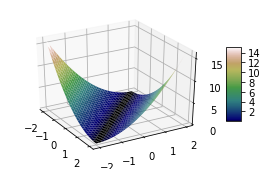

In [6]:
# 3D plotting code, contributed by student Laurens Sandt

for i in range(4):
    
    for xi in range(n):
        for yi in range(n):
            w = np.array([ wRange[xi], wRange[yi] ])
            qf[xi,yi] = w.T@S[i]@w

    # show the map 
    fig = plt.figure(figsize=(10,6))
    ax1 = fig.add_subplot(221+i, projection='3d')

    X,Y = np.meshgrid(wRange,wRange)
    Z = qf.T

    mycmap = plt.get_cmap('gist_earth')
    surf1 = ax1.plot_surface(X, Y, Z, cmap=mycmap)
    fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)
    
    # play with the azim and elevation to look at the plot from different perspectives
    ax1.view_init(azim=-30, elev=30)

plt.show()


---
# VIDEO: Eigenvectors and the quadratic form surface
---


[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


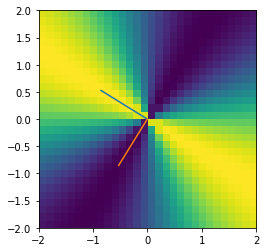

In [11]:
# a happy little symmetric matrix
A = [ [1,2],[2,3] ]

# range for vector w
n = 30
wRange = np.linspace(-2,2,n)

# initialize quadratic form matrix
qf = np.zeros( (len(wRange),len(wRange)) )

# compute QF
for xi in range(n):
    for yi in range(n):
        # this w
        w = np.transpose([ wRange[xi], wRange[yi] ])

        # QF
        qf[xi,yi] = np.transpose(w)@A@w / (np.transpose(w)@w)


# compute eigendecomposition
D,V = np.linalg.eig(A)

# show the surface
plt.imshow(qf,extent=[-2,2,-2,2])

# show the eigenvectors
plt.plot( [0,V[0,0]],[0,V[1,0]]  )
plt.plot( [0,V[0,1]],[0,V[1,1]]  )
print(V)
plt.show()



---
VIDEO: Application of the normalized quadratic form: PCA
---


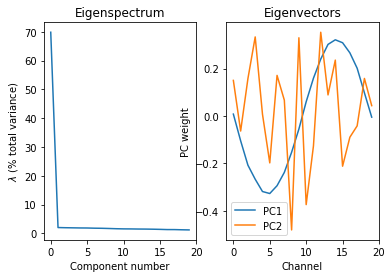

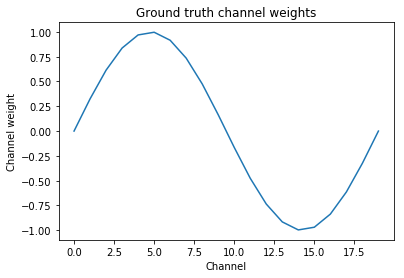

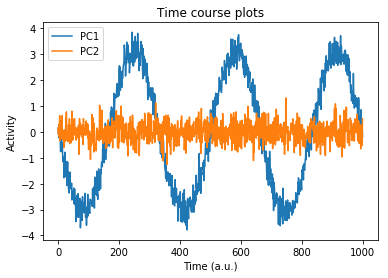

In [8]:
# simulation parameters
N = 1000 # time points
M =   20 # channels

# time vector (radian units)
t = np.linspace(0,6*np.pi,N)

# relationship across channels (imposing covariance)
chanrel = np.sin(np.linspace(0,2*np.pi,M))

# initialize data
data = np.zeros((M,N))

# create dataset
for i in np.arange(0,M):
    data[i,:] = np.sin(t) * chanrel[i]

# add noise
data = data + np.random.randn(M,N)/3
    
# mean-center
for i in np.arange(0,M):
    data[i,:] = data[i,:] - np.mean(data[i,:])


# compute covariance matrix
covmat = data@data.T/(N-1)

# eigendecomposition of the covariance matrix
evals,evecs = np.linalg.eig( covmat )

# sort eigenvalues and eigenvectors
idx = evals.argsort()[::-1]   
evals = np.real( evals[idx] )
evecs = evecs[:,idx]

# convert eigenvalues to percent variance explained
evals = 100*evals/np.sum(evals)


# compute component time series
r = 2 # two components
comp_time_series = evecs[:,0:r].T@data


# visualize and interpret the results

# eigenvalues
plt.subplot(121)
plt.plot(evals)
plt.xlabel('Component number')
plt.ylabel('$\lambda$ (% total variance)')
plt.title('Eigenspectrum')

# eigenvectors
plt.subplot(122)
plt.plot(evecs[:,0],label='PC1')
plt.plot(evecs[:,1],label='PC2')
plt.xlabel('Channel')
plt.ylabel('PC weight')
plt.title('Eigenvectors')
plt.legend()
plt.show()

# original channel modulator
plt.plot(chanrel)
plt.xlabel('Channel')
plt.ylabel('Channel weight')
plt.title('Ground truth channel weights')
plt.show()

# component time series
plt.plot(comp_time_series[0,:],label='PC1')
plt.plot(comp_time_series[1,:],label='PC2')
plt.xlabel('Time (a.u.)')
plt.ylabel('Activity')
plt.legend()
plt.title('Time course plots')
plt.show()

# Quadratic form of generalized eigenvectors

In [132]:
# create two symmetric matrices
m = 14
n = 1000

# create A as random sine-modulated noise, then its covariance matrix
A = np.zeros((m,n))
for i in range(0,n):
    A[:,i] = np.random.randn(m) * np.cos(np.linspace(0,np.pi,m))
A = A@A.T


# B is the same thing, just different random numbers
B = np.zeros((m,n))
for i in range(0,n):
    B[:,i] = np.random.randn(m) * np.cos(np.linspace(0,np.pi,m))
B = B@B.T

# generalized eigendecomposition
evals,evecs = linalg.eig(A,B)

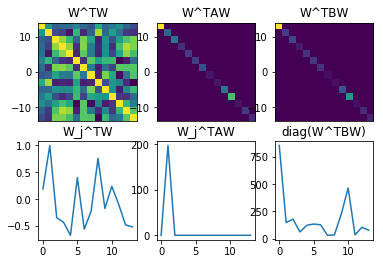

In [133]:
## some plotting

# W'W
plt.subplot(231)
plt.imshow(evecs.T@evecs,extent=[-m,m,-m,m])
plt.xticks([])
plt.title('W^TW')

# one row of W'W
tmp = evecs.T@evecs
plt.subplot(234)
plt.plot(tmp[1,:])
plt.title('W_j^TW')

# W'AW
plt.subplot(232)
plt.imshow(evecs.T@A@evecs,extent=[-m,m,-m,m])
plt.xticks([])
plt.title('W^TAW')

# one row of W'AW
tmp = evecs.T@A@evecs
plt.subplot(235)
plt.plot(tmp[1,:])
plt.title('W_j^TAW')

# W'BW
plt.subplot(233)
plt.imshow(evecs.T@B@evecs,extent=[-m,m,-m,m])
plt.xticks([])
plt.title('W^TBW')

# diagonal of W'BW
plt.subplot(236)
plt.plot(np.diag(evecs.T@B@evecs))
plt.title('diag(W^TBW)')

plt.show()


In [129]:
A = [[1,2,3],
     [2,3,7],
     [3,7,1]];
B = [[11,1,4],
     [1,11,2],
     [4,2,11]];

D,V = linalg.eig(A,B)
print(D)

[ 0.71245548+0.j -0.01319932+0.j -0.66699809+0.j]



---
VIDEO: Matrix definiteness, geometry, and eigenvalues
---


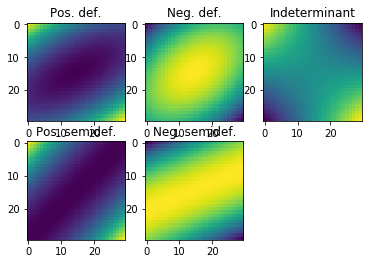

In [7]:
# some different matrices
S = np.zeros((5,), dtype=np.object)
S[0] = [ [4,4], [4,9] ]
S[1] = [ [-4,-1], [-3,-5] ]
S[2] = [ [0,1], [2,0] ]
S[3] = [ [1,1], [1,1] ]
S[4] = [ [-1,-2], [-3,-6] ]



# range for vector w
n = 30
wRange = np.linspace(-2,2,n)

# initialize quadratic form matrix
qf = np.zeros( (len(wRange),len(wRange)) )


for i in range(5):
    
    # compute QF
    for xi in range(n):
        for yi in range(n):
            # this w
            w = np.transpose([ wRange[xi], wRange[yi] ])
            
            # QF
            qf[xi,yi] = np.transpose(w)@S[i]@w
    
    # show the map
    plt.subplot(2,3,i+1)
    plt.imshow(qf.T)
    
    ## compute the matrix's definiteness based on the eigenvalues
    
    # get eigenvalues
    evals = np.linalg.eig(S[i])
    
    # we care about their signs
    esign = np.sign(evals[0])
    
    # test for signs (note: this test is valid only for 2x2 matrices!)
    if sum(esign)==2:
        defcat = 'Pos. def.'
    elif sum(esign)==1:
        defcat = 'Pos. semidef.'
    elif sum(esign)==0:
        defcat = 'Indeterminant'
    elif sum(esign)==-1:
        defcat = 'Neg. semidef.'
    elif sum(esign)==-2:
        defcat = 'Neg. def.'
    
    # add title
    plt.title(defcat)

plt.show()